<a href="https://colab.research.google.com/github/sarah-alhajri/Classification_with_ANN_Churn/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Sarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
SEED = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDA_ML/SDA-ML/Assignment 1/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df

In [ ]:
df.drop(columns=['Surname','CustomerId','RowNumber'],inplace=True)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df[df.columns[1:]].corr()['Exited'][:].sort_values(ascending=False).drop("Exited").to_frame()

,Exited
Age,0.285
Balance,0.119
EstimatedSalary,0.012
HasCrCard,-0.007
Tenure,-0.014
NumOfProducts,-0.048
IsActiveMember,-0.156


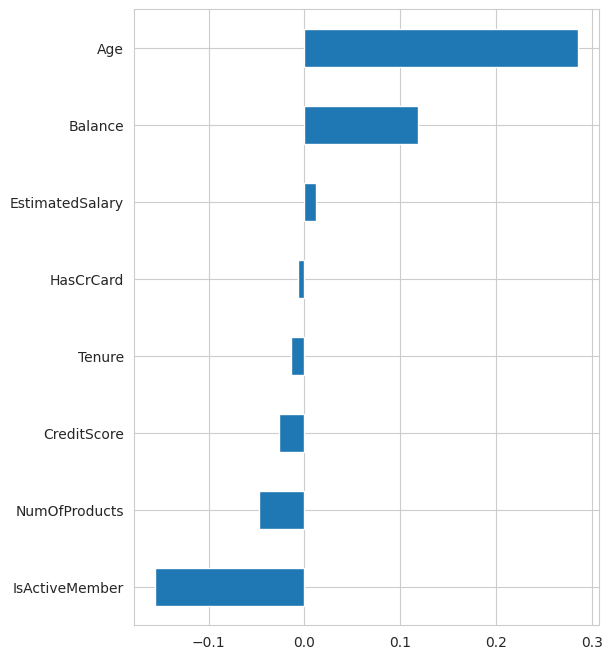

In [ ]:
plt.figure(figsize=(6, 8))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

In [ ]:
def color_red(val):

    if (val > 0.75 and val < 1) or (val < -0.75 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

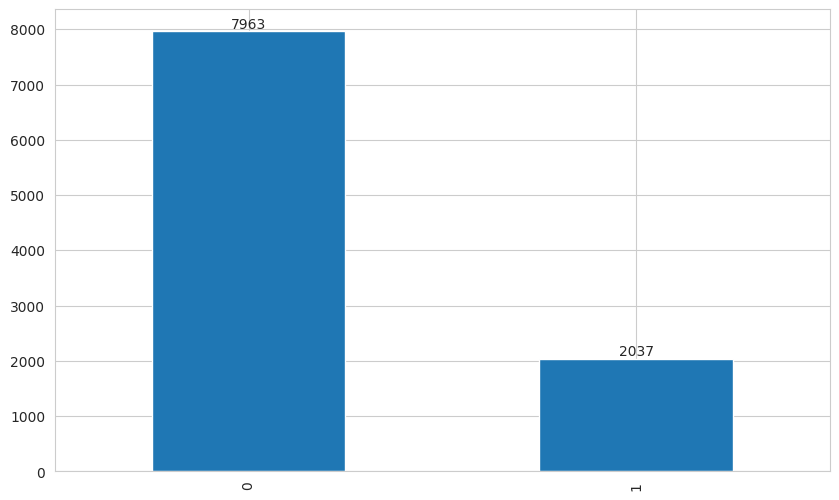

In [ ]:
ax=df.Exited.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

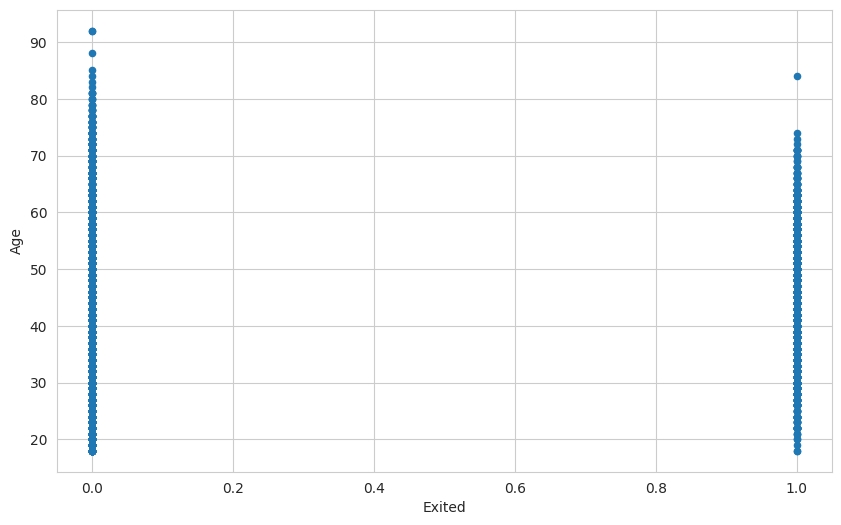

In [ ]:
ax=df.plot(kind='scatter',x='Exited',y='Age')

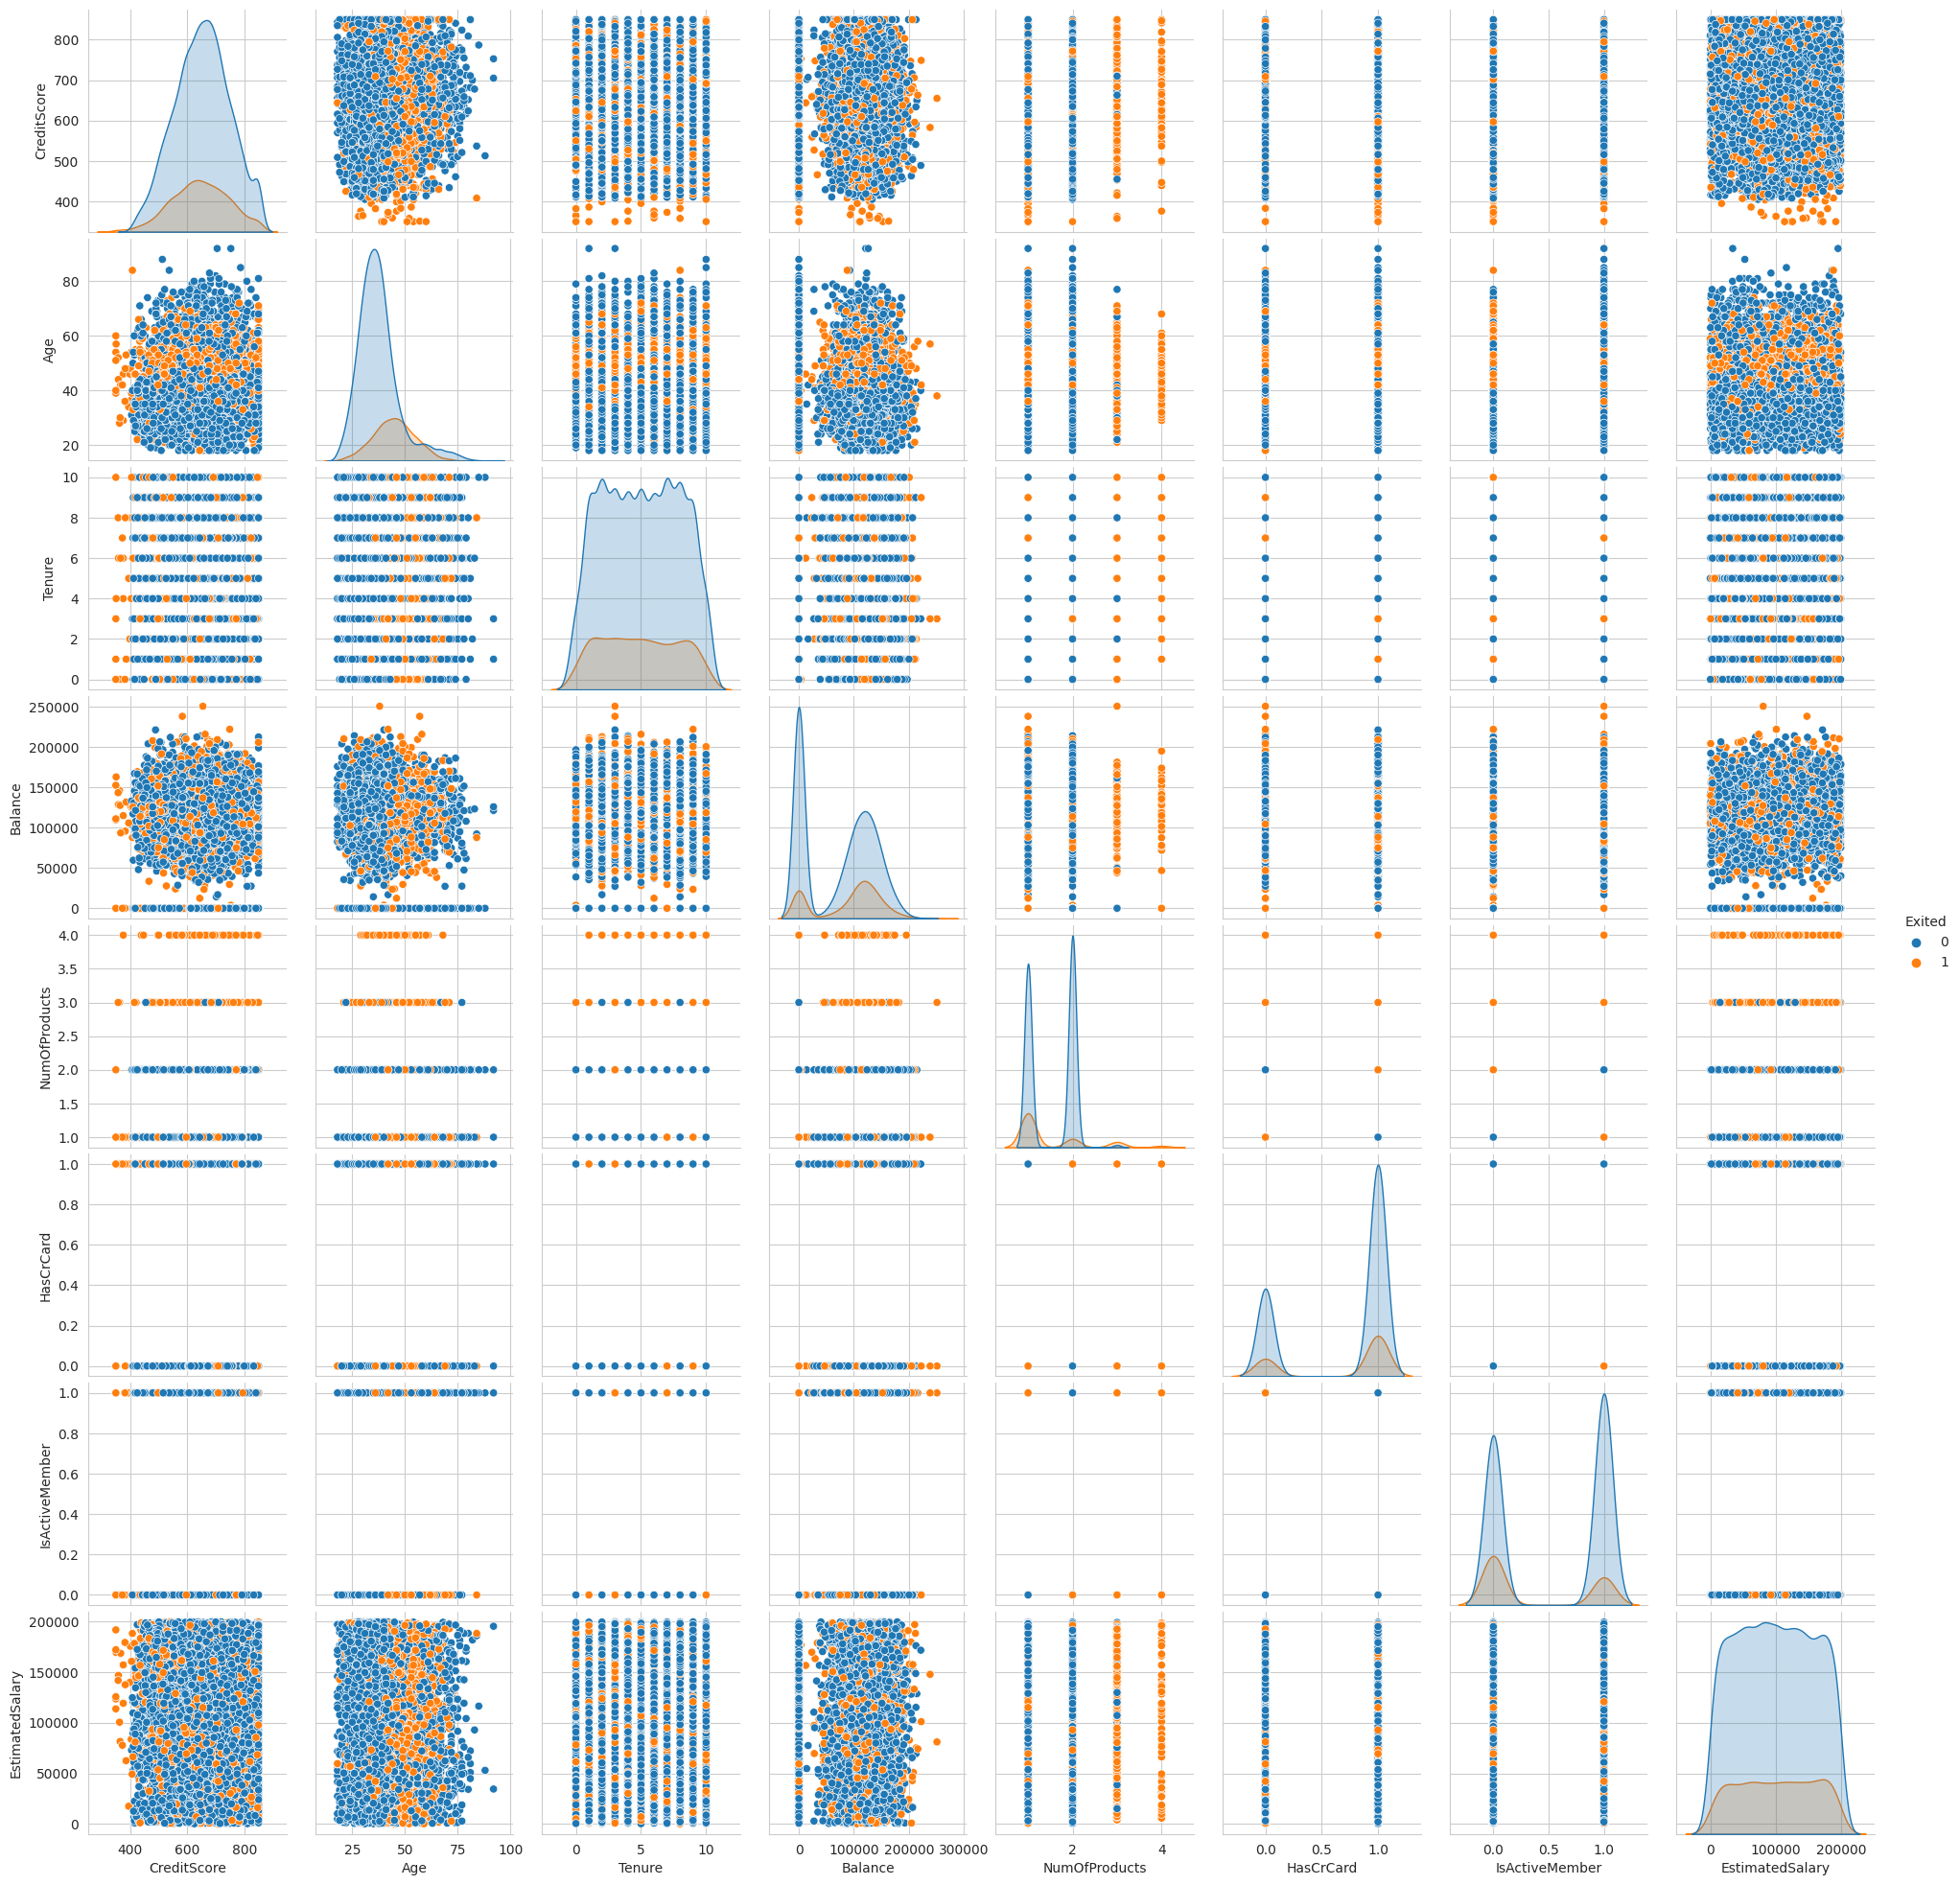

In [ ]:
sns.pairplot(df,hue='Exited')

## There's a lot of overlapping!

In [ ]:
df.select_dtypes("object").columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

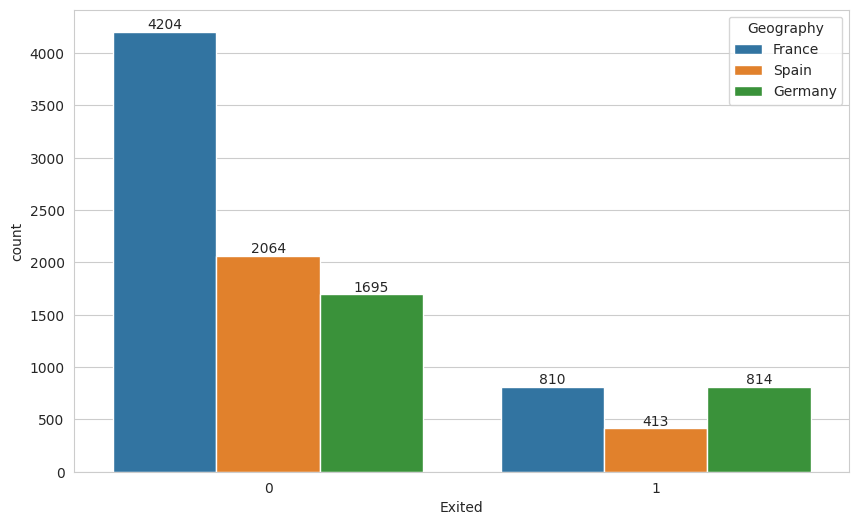

In [ ]:
ax = sns.countplot(x="Exited", hue="Geography", data = df)
for p in ax.containers:
    ax.bar_label(p)

## Outliers :

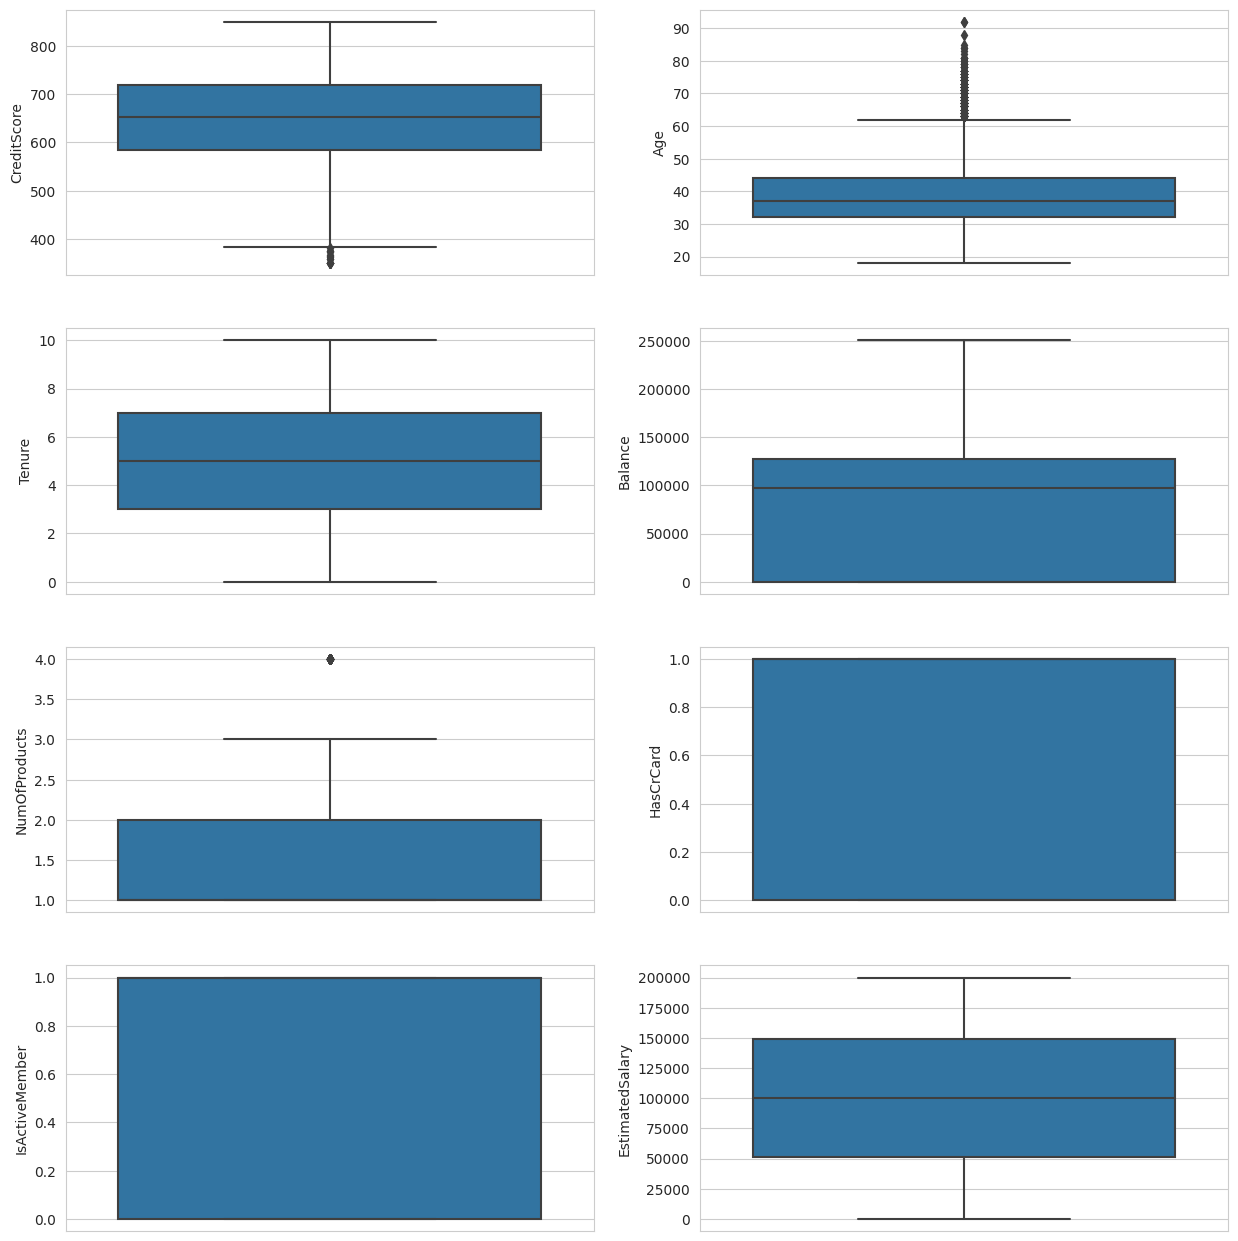

In [ ]:
plt.figure(figsize=(15,20))
for n,col in enumerate(df.drop(columns=df.select_dtypes("object")).columns[:-1]):
  plt.subplot(5,2,n+1)
  sns.boxplot(data=df, y = df[col], hue=df['Exited'])

### Age have some outliers --> I will not drop it

In [ ]:
df.columns[:-1]

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=SEED
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.1, random_state=SEED
)

In [ ]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore",sparse=False), df.select_dtypes("object").columns ),
                        # remainder='passthrough',
                        remainder=MinMaxScaler(),
    verbose_feature_names_out=False)

In [ ]:
# scaler = MinMaxScaler()
X_train = column_trans.fit_transform(X_train)
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [47]:
ANN_without_CW_model = Sequential()

ANN_without_CW_model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
ANN_without_CW_model.add(Dense(9, activation="relu"))
ANN_without_CW_model.add(Dense(1, activation="sigmoid"))

ANN_without_CW_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

ANN_without_CW_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50, epochs=200, verbose=1)


Epoch 1/200
162/162 [==============================] - 2s 7ms/step - loss: 0.5882 - recall: 0.1630 - val_loss: 0.4946 - val_recall: 0.0000e+00
Epoch 2/200
162/162 [==============================] - 1s 6ms/step - loss: 0.4795 - recall: 0.0000e+00 - val_loss: 0.4787 - val_recall: 0.0000e+00
Epoch 3/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4630 - recall: 0.0109 - val_loss: 0.4667 - val_recall: 0.0164
Epoch 4/200
162/162 [==============================] - 1s 3ms/step - loss: 0.4518 - recall: 0.0667 - val_loss: 0.4606 - val_recall: 0.0929
Epoch 5/200
162/162 [==============================] - 1s 3ms/step - loss: 0.4428 - recall: 0.1242 - val_loss: 0.4517 - val_recall: 0.1202
Epoch 6/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4349 - recall: 0.1570 - val_loss: 0.4450 - val_recall: 0.1202
Epoch 7/200
162/162 [==============================] - 1s 3ms/step - loss: 0.4282 - recall: 0.1933 - val_loss: 0.4398 - val_recall: 0.1311
Epoch 8/200
162

In [48]:
ANN_without_CW_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 18)                252       
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
loss_df = pd.DataFrame(ANN_without_CW_model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.588,0.163,0.495,0.000
1,0.479,0.000,0.479,0.000
2,0.463,0.011,0.467,0.016
3,0.452,0.067,0.461,0.093
4,0.443,0.124,0.452,0.120


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

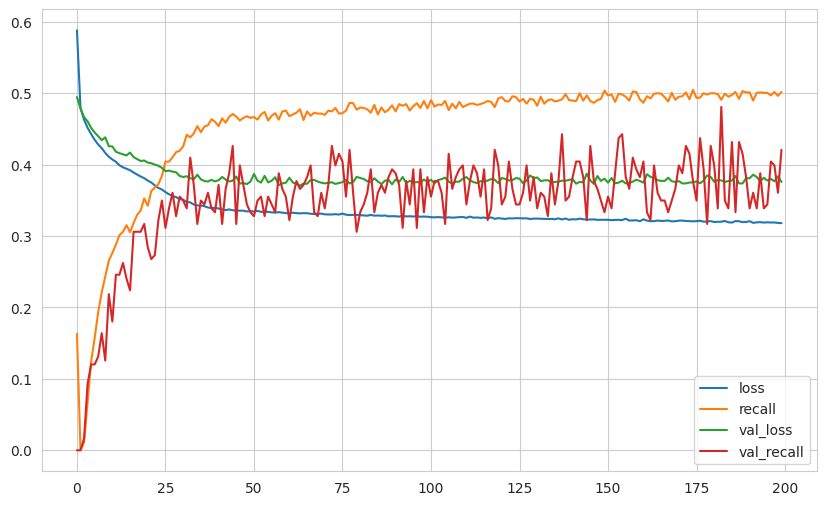

In [50]:
loss_df.plot()
plt.show()

In [51]:
loss, accuracy = ANN_without_CW_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34420913457870483
accuracy:  0.5098039507865906


In [52]:
print("*********TEST SET*********")
y_pred = ANN_without_CW_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = ANN_without_CW_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

# The model.predict(X_test) function generates predicted probabilities for each sample in the test data.
# The > 0.5 comparison is applied element-wise to the predicted probabilities,
# resulting in a boolean array where True indicates that the probability is greater than 0.5 and False otherwise.

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[748  48]
 [100 104]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.68      0.51      0.58       204

    accuracy                           0.85      1000
   macro avg       0.78      0.72      0.75      1000
weighted avg       0.84      0.85      0.84      1000

*********TRAIN SET*********
254/254 [==============================] - 0s 2ms/step
[[6169  281]
 [ 776  874]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6450
           1       0.76      0.53      0.62      1650

    accuracy                           0.87      8100
   macro avg       0.82      0.74      0.77      8100
weighted avg       0.86      0.87      0.86      8100



"loss, accuracy = model.evaluate(X_test, y_test, verbose=0)", uses the evaluate method to calculate the model's accuracy directly. The evaluate method compares the predicted labels (not probabilities) with the true labels and calculates the accuracy based on the comparison. This approach provides a more direct measure of the model's performance without relying on a fixed threshold.

32/32 [==============================] - 0s 2ms/step


0.8604665484284166

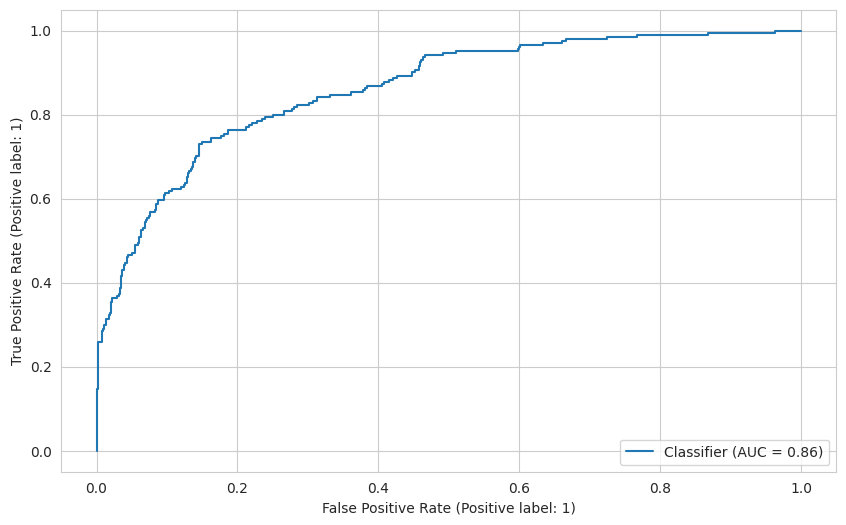

In [53]:
y_pred_roc = ANN_without_CW_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred_roc)

In [119]:
y_pred_roc = ANN_without_CW_model.predict(X_test)

ANN_without_CW_AP = roc_auc_score(y_test, y_pred_roc)
ANN_without_CW_f1 = 0.75
ANN_without_CW_recall =0.72

32/32 [==============================] - 0s 2ms/step


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### The `compute_class_weight` method is a function provided by scikit-learn that helps calculate class weights for imbalanced datasets.

In [68]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.62790698, 2.45454545])

In [57]:
ANN_with_CW_model = Sequential()

ANN_with_CW_model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
ANN_with_CW_model.add(Dense(9, activation="relu"))
ANN_with_CW_model.add(Dense(9, activation="relu"))
ANN_with_CW_model.add(Dense(1, activation="sigmoid"))

ANN_with_CW_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

ANN_with_CW_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50,
          epochs=200, verbose=1,
          # class_weight = {0: 1, 1: 4},
          class_weight = {0: class_weights[0], 1: class_weights[1]}
           )


Epoch 1/200
162/162 [==============================] - 4s 16ms/step - loss: 0.6860 - recall: 0.5121 - val_loss: 0.6395 - val_recall: 0.4809
Epoch 2/200
162/162 [==============================] - 1s 8ms/step - loss: 0.6394 - recall: 0.6436 - val_loss: 0.6229 - val_recall: 0.6612
Epoch 3/200
162/162 [==============================] - 1s 5ms/step - loss: 0.6088 - recall: 0.6661 - val_loss: 0.5772 - val_recall: 0.6011
Epoch 4/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5779 - recall: 0.7006 - val_loss: 0.5668 - val_recall: 0.6667
Epoch 5/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5459 - recall: 0.7218 - val_loss: 0.5181 - val_recall: 0.6776
Epoch 6/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5203 - recall: 0.7267 - val_loss: 0.5443 - val_recall: 0.7268
Epoch 7/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5039 - recall: 0.7448 - val_loss: 0.4929 - val_recall: 0.6995
Epoch 8/200
162/162 [=====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

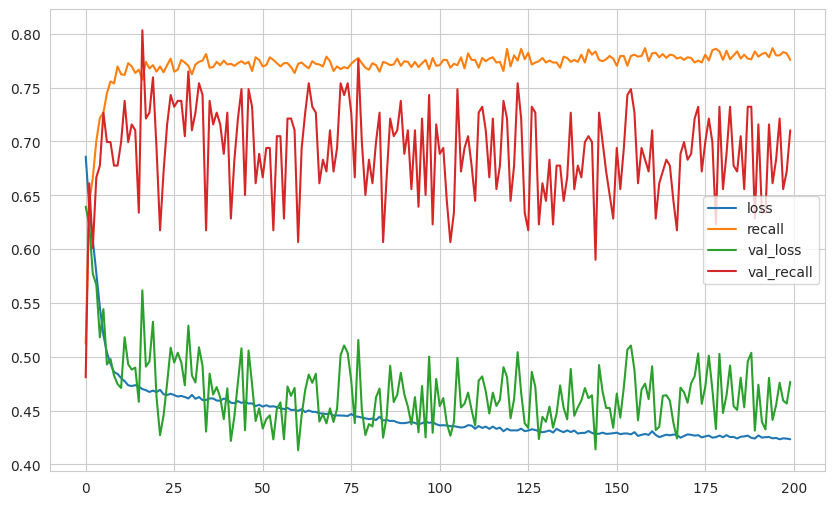

In [58]:
loss_df = pd.DataFrame(ANN_with_CW_model.history.history)
loss_df.plot()
plt.show()

In [59]:
loss, accuracy = ANN_with_CW_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.47140491008758545
accuracy:  0.7598039507865906


Without Class_weight :
*   loss:  0.3496895432472229
*  accuracy:  0.5196078419685364

In [63]:
print("*********TEST SET*********")
y_pred = ANN_with_CW_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = ANN_with_CW_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[623 173]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.76      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.79      1000

*********TRAIN SET*********
254/254 [==============================] - 0s 2ms/step
[[5134 1316]
 [ 315 1335]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6450
           1       0.50      0.81      0.62      1650

    accuracy                           0.80      8100
   macro avg       0.72      0.80      0.74      8100
weighted avg       0.85      0.80      0.81      8100



In [64]:
y_pred_roc = ANN_with_CW_model.predict(X_test)

ANN_with_CW_model_AP = roc_auc_score(y_test, y_pred_roc)
ANN_with_CW_model_f1 =0.72
ANN_with_CW_model_recall =0.77

32/32 [==============================] - 0s 2ms/step


Recall of class 0 (majority) was  0.94 --> 0.77 ,
but class 1 was 0.52 --> 0.78

32/32 [==============================] - 0s 2ms/step


0.771233619075771

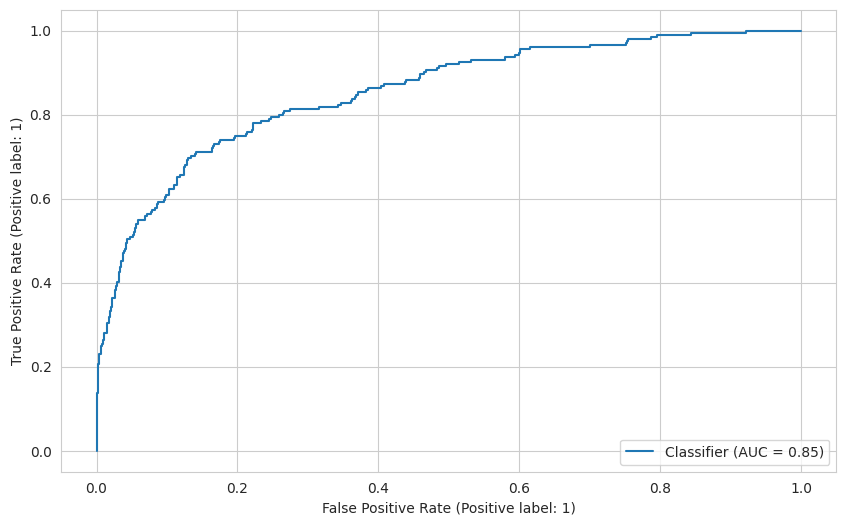

In [65]:
y_pred_roc = ANN_with_CW_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [70]:
from tensorflow.keras.optimizers import Adam

ANN_LR_model = Sequential()

ANN_LR_model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
ANN_LR_model.add(Dense(9, activation="relu"))
ANN_LR_model.add(Dense(9, activation="relu"))
ANN_LR_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005) # Defaults is 0.001
ANN_LR_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

ANN_LR_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50,
          epochs=200, verbose=1,
          class_weight = {0: class_weights[0], 1: class_weights[1]})


Epoch 1/200
162/162 [==============================] - 2s 5ms/step - loss: 0.6376 - recall: 0.6642 - val_loss: 0.5395 - val_recall: 0.4426
Epoch 2/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5919 - recall: 0.6939 - val_loss: 0.5075 - val_recall: 0.4754
Epoch 3/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5781 - recall: 0.6855 - val_loss: 0.6066 - val_recall: 0.6995
Epoch 4/200
162/162 [==============================] - 1s 5ms/step - loss: 0.5792 - recall: 0.6879 - val_loss: 0.6290 - val_recall: 0.7322
Epoch 5/200
162/162 [==============================] - 1s 5ms/step - loss: 0.5605 - recall: 0.6909 - val_loss: 0.5062 - val_recall: 0.5738
Epoch 6/200
162/162 [==============================] - 1s 5ms/step - loss: 0.5118 - recall: 0.7194 - val_loss: 0.5870 - val_recall: 0.7814
Epoch 7/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4923 - recall: 0.7527 - val_loss: 0.4766 - val_recall: 0.6557
Epoch 8/200
162/162 [======

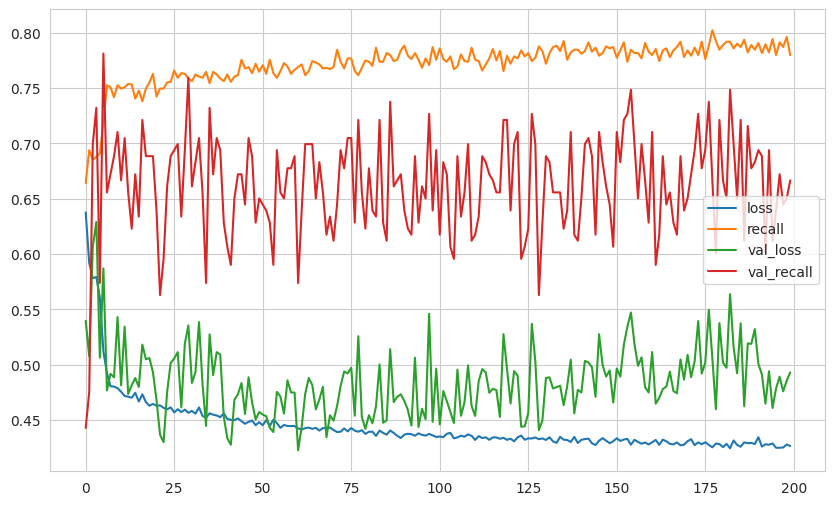

In [71]:
loss_df = pd.DataFrame(ANN_LR_model.history.history)
loss_df.plot()
plt.show()

In [72]:
loss, accuracy = ANN_LR_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.45701953768730164
accuracy:  0.7598039507865906


In [73]:
print("*********TEST SET*********")
y_pred = ANN_LR_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = ANN_LR_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[630 166]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.76      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.79      0.80      1000

*********TRAIN SET*********
254/254 [==============================] - 1s 2ms/step
[[5162 1288]
 [ 325 1325]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6450
           1       0.51      0.80      0.62      1650

    accuracy                           0.80      8100
   macro avg       0.72      0.80      0.74      8100
weighted avg       0.85      0.80      0.82      8100



In [74]:
y_pred_roc = ANN_LR_model.predict(X_test)

ANN_LR_model_AP = roc_auc_score(y_test, y_pred_roc)
ANN_LR_model_f1 = 0.72
ANN_LR_model_recall =0.78

32/32 [==============================] - 0s 4ms/step


32/32 [==============================] - 0s 3ms/step


0.7790915361119322

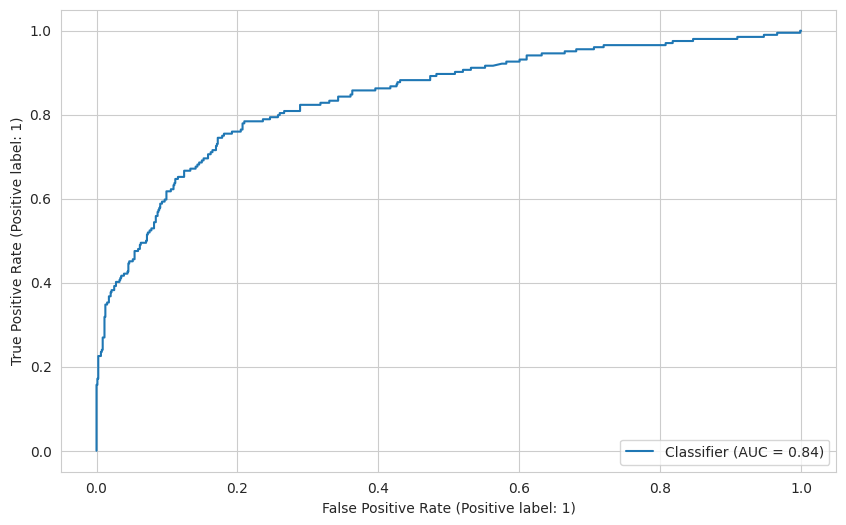

In [ ]:
y_pred_roc = ANN_LR_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred)

## There is no that improvement .

### Add Dropout Layer

In [77]:
from tensorflow.keras.layers import Dropout

DO_model = Sequential()

DO_model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
DO_model.add(Dropout(0.15))
DO_model.add(Dense(9, activation="relu"))
DO_model.add(Dropout(0.15))
DO_model.add(Dense(9, activation="relu"))
DO_model.add(Dropout(0.15))
DO_model.add(Dense(1, activation="sigmoid"))

DO_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["Recall"])

DO_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50,
          epochs=200, verbose=1,
          class_weight = {0: class_weights[0], 1: class_weights[1]})


Epoch 1/200
162/162 [==============================] - 3s 6ms/step - loss: 0.6897 - recall: 0.5697 - val_loss: 0.6630 - val_recall: 0.3497
Epoch 2/200
162/162 [==============================] - 1s 6ms/step - loss: 0.6680 - recall: 0.5982 - val_loss: 0.6310 - val_recall: 0.5137
Epoch 3/200
162/162 [==============================] - 1s 6ms/step - loss: 0.6520 - recall: 0.6436 - val_loss: 0.6191 - val_recall: 0.5574
Epoch 4/200
162/162 [==============================] - 1s 6ms/step - loss: 0.6412 - recall: 0.6606 - val_loss: 0.6584 - val_recall: 0.7104
Epoch 5/200
162/162 [==============================] - 1s 5ms/step - loss: 0.6341 - recall: 0.6709 - val_loss: 0.6120 - val_recall: 0.6339
Epoch 6/200
162/162 [==============================] - 1s 4ms/step - loss: 0.6293 - recall: 0.6885 - val_loss: 0.5858 - val_recall: 0.5738
Epoch 7/200
162/162 [==============================] - 1s 4ms/step - loss: 0.6197 - recall: 0.6758 - val_loss: 0.5768 - val_recall: 0.5574
Epoch 8/200
162/162 [======

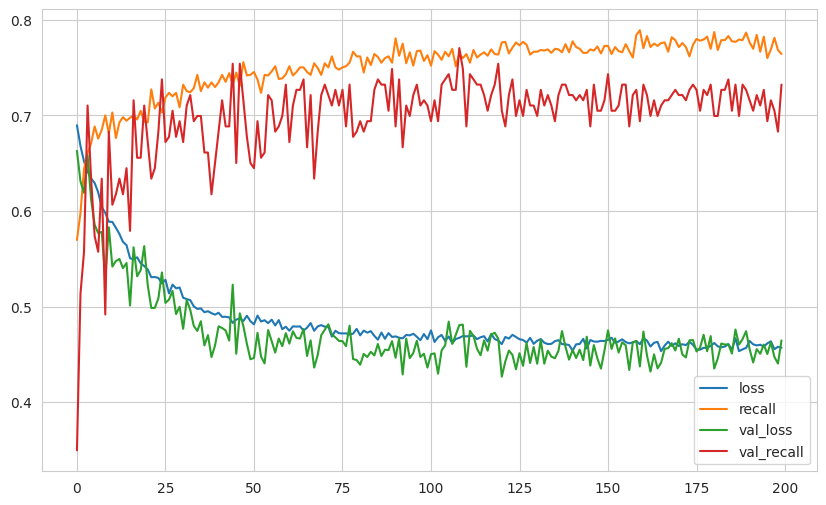

In [78]:
loss_df = pd.DataFrame(DO_model.history.history)
loss_df.plot()
plt.show()

In [79]:
loss, accuracy = DO_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4647170305252075
accuracy:  0.7745097875595093


In [85]:
print("*********TEST SET*********")
y_pred = DO_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = DO_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[616 180]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.47      0.77      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.84      0.77      0.79      1000

*********TRAIN SET*********
254/254 [==============================] - 1s 2ms/step
[[5089 1361]
 [ 329 1321]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6450
           1       0.49      0.80      0.61      1650

    accuracy                           0.79      8100
   macro avg       0.72      0.79      0.73      8100
weighted avg       0.85      0.79      0.81      8100



In [86]:
y_pred_roc = DO_model.predict(X_test)

DO_model_AP = roc_auc_score(y_test, y_pred_roc)
DO_model_f1 = 0.71
DO_model_recall =0.77

32/32 [==============================] - 0s 4ms/step


32/32 [==============================] - 0s 3ms/step


0.8583111636614446

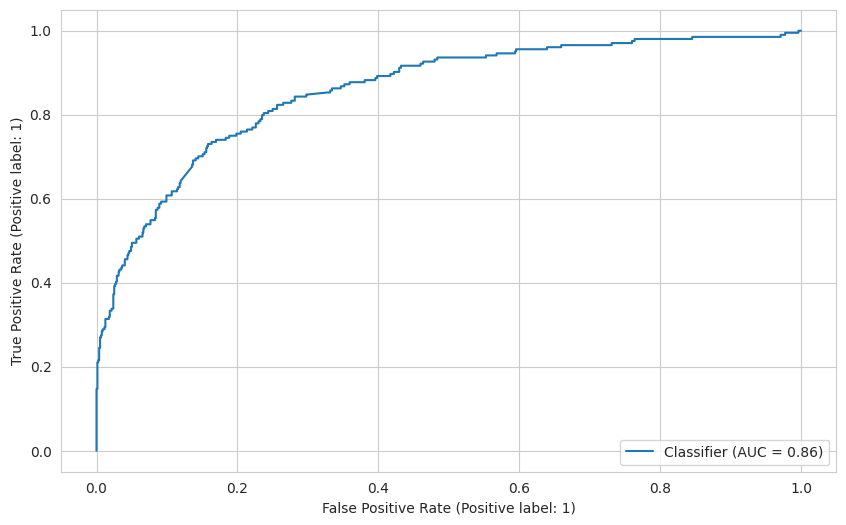

In [82]:
y_pred_roc = DO_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred_roc)

### Add Early Stop

In [87]:
ES_model = Sequential()

ES_model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
ES_model.add(Dense(9, activation="relu"))
ES_model.add(Dense(9, activation="relu"))
ES_model.add(Dense(1, activation="sigmoid"))

ES_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["Recall"])


#### Monitor the "val_loss" as metric

In [88]:
early_stop_val_loss = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [89]:
ES_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50,
          epochs=200, verbose=1,
          class_weight = {0: class_weights[0], 1: class_weights[1]}, callbacks=[early_stop_val_loss],)


Epoch 1/200
162/162 [==============================] - 2s 5ms/step - loss: 0.6814 - recall: 0.6752 - val_loss: 0.6527 - val_recall: 0.6011
Epoch 2/200
162/162 [==============================] - 1s 4ms/step - loss: 0.6383 - recall: 0.6745 - val_loss: 0.6197 - val_recall: 0.6066
Epoch 3/200
162/162 [==============================] - 1s 4ms/step - loss: 0.6138 - recall: 0.6933 - val_loss: 0.6045 - val_recall: 0.6393
Epoch 4/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5959 - recall: 0.6988 - val_loss: 0.6251 - val_recall: 0.7049
Epoch 5/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5824 - recall: 0.6982 - val_loss: 0.5889 - val_recall: 0.6612
Epoch 6/200
162/162 [==============================] - 1s 5ms/step - loss: 0.5752 - recall: 0.6909 - val_loss: 0.5787 - val_recall: 0.6721
Epoch 7/200
162/162 [==============================] - 1s 5ms/step - loss: 0.5695 - recall: 0.6976 - val_loss: 0.5733 - val_recall: 0.6503
Epoch 8/200
162/162 [======

it stop at 37/200 epoch

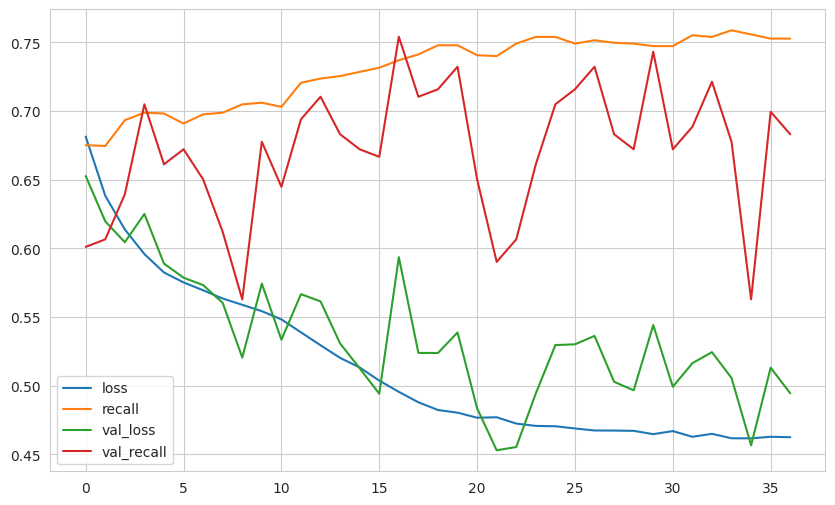

In [90]:
loss_df = pd.DataFrame(ES_model.history.history)
# loss_df
loss_df.plot()
plt.show()

In [91]:
loss, accuracy = ES_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4386434853076935
accuracy:  0.656862735748291


In [92]:
print("*********TEST SET*********")
y_pred = ES_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = ES_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[659 137]
 [ 70 134]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       796
           1       0.49      0.66      0.56       204

    accuracy                           0.79      1000
   macro avg       0.70      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000

*********TRAIN SET*********
254/254 [==============================] - 0s 2ms/step
[[5429 1021]
 [ 517 1133]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      6450
           1       0.53      0.69      0.60      1650

    accuracy                           0.81      8100
   macro avg       0.72      0.76      0.74      8100
weighted avg       0.83      0.81      0.82      8100



In [93]:
# val_loss is better than val_recall
y_pred_roc = ES_model.predict(X_test)

ES_model_AP = roc_auc_score(y_test, y_pred_roc)
ES_model_f1 = 0.71
ES_model_recall =0.74

32/32 [==============================] - 0s 2ms/step


32/32 [==============================] - 0s 2ms/step


0.8384015666568135

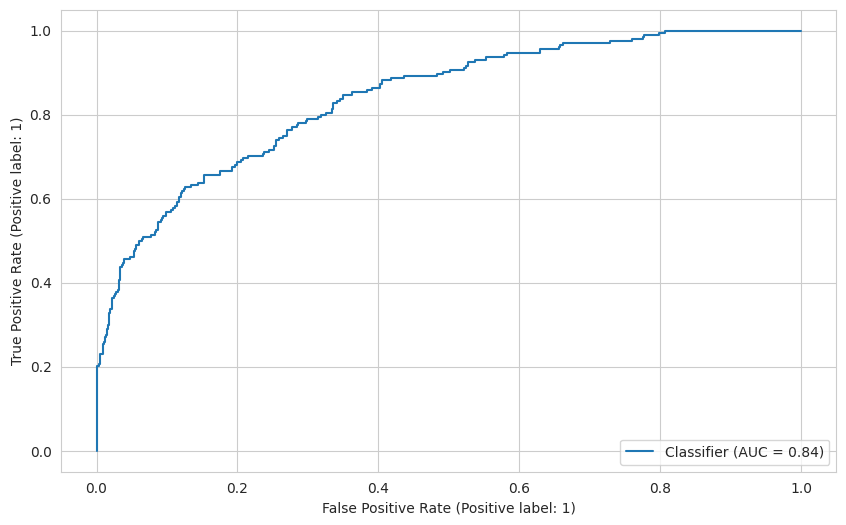

In [94]:
y_pred_roc = ES_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred_roc)

#### Monitor the "val_recall" as metric

In [96]:
early_stop_val_recall = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [97]:
ES_model.fit( x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=50,
          epochs=200, verbose=1,
          class_weight = {0: class_weights[0], 1: class_weights[1]}, callbacks=[early_stop_val_recall],)


Epoch 1/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4729 - recall: 0.7503 - val_loss: 0.4467 - val_recall: 0.5902
Epoch 2/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4702 - recall: 0.7467 - val_loss: 0.4752 - val_recall: 0.6284
Epoch 3/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4687 - recall: 0.7558 - val_loss: 0.4611 - val_recall: 0.6120
Epoch 4/200
162/162 [==============================] - 1s 6ms/step - loss: 0.4708 - recall: 0.7515 - val_loss: 0.4897 - val_recall: 0.6721
Epoch 5/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4679 - recall: 0.7473 - val_loss: 0.4976 - val_recall: 0.6776
Epoch 6/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4673 - recall: 0.7515 - val_loss: 0.4973 - val_recall: 0.6831
Epoch 7/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4660 - recall: 0.7509 - val_loss: 0.4981 - val_recall: 0.6831
Epoch 8/200
162/162 [======

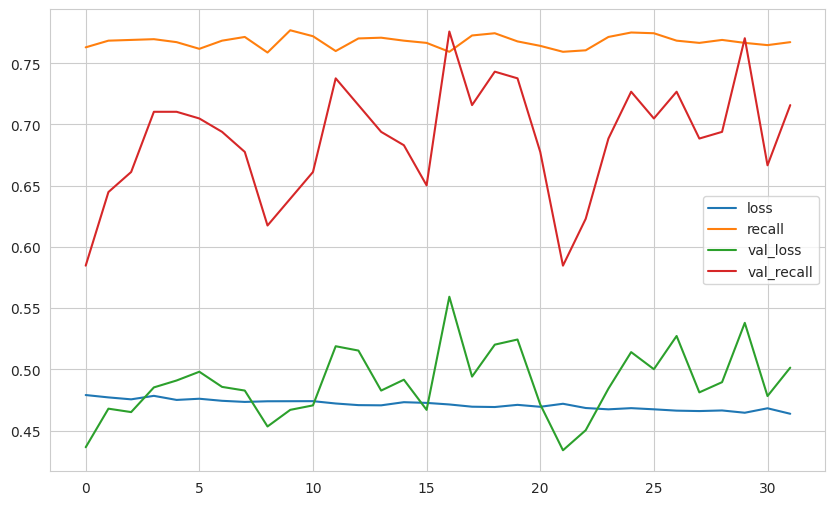

In [ ]:
loss_df = pd.DataFrame(ES_model.history.history)
loss_df.plot()
plt.show()

In [100]:
loss, accuracy = ES_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.553146243095398
accuracy:  0.7941176295280457


In [99]:
print("*********TEST SET*********")
y_pred = ES_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = ES_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[548 248]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       796
           1       0.40      0.79      0.53       204

    accuracy                           0.71      1000
   macro avg       0.66      0.74      0.66      1000
weighted avg       0.82      0.71      0.74      1000

*********TRAIN SET*********
254/254 [==============================] - 0s 2ms/step
[[4653 1797]
 [ 291 1359]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      6450
           1       0.43      0.82      0.57      1650

    accuracy                           0.74      8100
   macro avg       0.69      0.77      0.69      8100
weighted avg       0.84      0.74      0.77      8100



32/32 [==============================] - 0s 2ms/step


0.8424290570499555

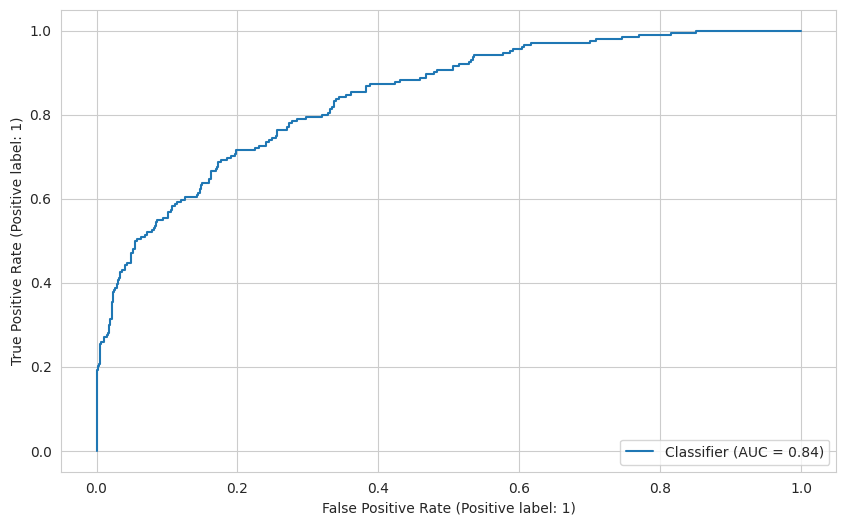

In [98]:
y_pred_roc = ES_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred_roc)

## Optuna

In [104]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00


In [105]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [106]:
trial_metric = "Recall"
batch_size = 50


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 1, 7)
    early_stop=trial.suggest_categorical("early_stop", [ early_stop_val_loss, early_stop_val_recall])
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [107]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 16:58:21,685] A new study created in memory with name: no-name-3e3d21bf-07f1-4263-9f0d-5e71357214c7


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 16:58:36,387] Trial 0 finished with value: 0.9950980544090271 and parameters: {'n_units1': 59, 'n_units2': 78, 'n_units3': 40, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.011616253909087638, 'w0': 0.10479302555803341, 'w1': 6.4483961744091385, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f705b3100>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 16:58:47,764] Trial 1 finished with value: 0.05882352963089943 and parameters: {'n_units1': 85, 'n_units2': 70, 'n_units3': 38, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.001070713457755174, 'w0': 0.09546875492880914, 'w1': 1.2679606740590776, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f703ad600>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2023-10-30 16:59:17,602] Trial 2 finished with value: 0.4264705777168274 and parameters: {'n_units1': 115, 'n_units2': 32, 'n_units3': 70, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.053729595789960824, 'w0': 1.5525505416820733, 'w1': 2.2088996239462717, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f70297310>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 16:59:31,658] Trial 3 finished with value: 0.9019607901573181 and parameters: {'n_units1': 66, 'n_units2': 43, 'n_units3': 52, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.006518707695762263, 'w0': 0.841296766889296, 'w1': 5.670988314197949, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f68686e00>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 16:59:43,333] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 51, 'n_units2': 70, 'n_units3': 59, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03343616295771035, 'w0': 3.2613319400306495, 'w1': 1.9166453720867445, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f687dcd60>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 17:00:10,528] Trial 5 finished with value: 0.9803921580314636 and parameters: {'n_units1': 44, 'n_units2': 61, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005773712797328993, 'w0': 0.09240498206812277, 'w1': 3.907672122917541, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f685f3190>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 17:00:25,355] Trial 6 finished with value: 0.9656862616539001 and parameters: {'n_units1': 11, 'n_units2': 33, 'n_units3': 106, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.028886418310750353, 'w0': 0.09055578119210902, 'w1': 2.4347313707972025, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f6822a1a0>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:00:37,312] Trial 7 finished with value: 0.3578431308269501 and parameters: {'n_units1': 93, 'n_units2': 100, 'n_units3': 96, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0004707093881338083, 'w0': 2.8704405033094798, 'w1': 1.7947910293095213, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f7c147e20>}. Best is trial 0 with value: 0.9950980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:00:48,796] Trial 8 finished with value: 1.0 and parameters: {'n_units1': 123, 'n_units2': 29, 'n_units3': 91, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 5.7583607468039644e-05, 'w0': 0.015607489741682088, 'w1': 4.535855146111095, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f686a2d10>}. Best is trial 8 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:01:00,203] Trial 9 finished with value: 0.8284313678741455 and parameters: {'n_units1': 115, 'n_units2': 87, 'n_units3': 49, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.295536817838278e-05, 'w0': 0.016823628693140743, 'w1': 1.7447120800413445, 'early_stop': <keras.src.callbacks.EarlyStopping object at 0x7c0f70258c70>}. Best is trial 8 with value: 1.0.


{'n_units1': 123,
 'n_units2': 29,
 'n_units3': 91,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 5.7583607468039644e-05,
 'w0': 0.015607489741682088,
 'w1': 4.535855146111095,
 'early_stop': <keras.src.callbacks.EarlyStopping at 0x7c0f704d9330>}

'n_units1': 123,

 'n_units2': 29,

 'n_units3': 91,

 'optimizer': keras.src.optimizers.adam.Adam,

 'learning_rate': 5.7583607468039644e-05,

 'w0': 0.015607489741682088,

 'w1': 4.535855146111095,

 'early_stop': <keras.src.callbacks.EarlyStopping at 0x7c0f704d9330>

In [113]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1, early_stop = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
    study.best_params["early_stop"]
)
tf.random.set_seed(42)
optuna_model = Sequential()
optuna_model.add(Dense(unit1, activation="relu"))
optuna_model.add(Dense(unit2, activation="relu"))
optuna_model.add(Dense(unit3, activation="relu"))
optuna_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
optuna_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
optuna_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    batch_size=50,
    epochs=200,
    verbose=1,
)

Epoch 1/200
162/162 [==============================] - 4s 10ms/step - loss: 0.6316 - recall: 0.0685 - val_loss: 0.5616 - val_recall: 0.0000e+00
Epoch 2/200
162/162 [==============================] - 1s 7ms/step - loss: 0.5133 - recall: 0.0000e+00 - val_loss: 0.4886 - val_recall: 0.0000e+00
Epoch 3/200
162/162 [==============================] - 1s 7ms/step - loss: 0.4842 - recall: 0.0000e+00 - val_loss: 0.4787 - val_recall: 0.0000e+00
Epoch 4/200
162/162 [==============================] - 1s 9ms/step - loss: 0.4757 - recall: 0.0000e+00 - val_loss: 0.4725 - val_recall: 0.0000e+00
Epoch 5/200
162/162 [==============================] - 2s 10ms/step - loss: 0.4695 - recall: 0.0000e+00 - val_loss: 0.4682 - val_recall: 0.0000e+00
Epoch 6/200
162/162 [==============================] - 2s 11ms/step - loss: 0.4650 - recall: 0.0000e+00 - val_loss: 0.4651 - val_recall: 0.0049
Epoch 7/200
162/162 [==============================] - 2s 10ms/step - loss: 0.4614 - recall: 0.0109 - val_loss: 0.4627 - va

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

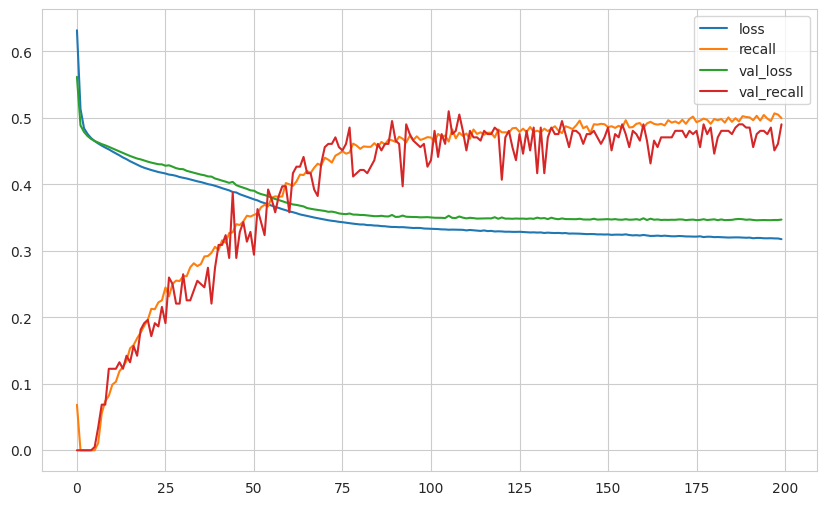

In [114]:
loss_df = pd.DataFrame(optuna_model.history.history)
loss_df.plot()
plt.show()

In [115]:
loss, accuracy = optuna_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3469603359699249
accuracy:  0.4901960790157318


In [116]:
print("*********TEST SET*********")
y_pred = optuna_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********TRAIN SET*********")
y_predT = optuna_model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

*********TEST SET*********
32/32 [==============================] - 0s 2ms/step
[[756  40]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

*********TRAIN SET*********
254/254 [==============================] - 1s 2ms/step
[[6164  286]
 [ 783  867]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6450
           1       0.75      0.53      0.62      1650

    accuracy                           0.87      8100
   macro avg       0.82      0.74      0.77      8100
weighted avg       0.86      0.87      0.86      8100



In [118]:
y_pred_roc = optuna_model.predict(X_test)

optuna_model_AP = roc_auc_score(y_test, y_pred_roc)
optuna_model_f1 = 0.75
optuna_model_recall =0.72

32/32 [==============================] - 0s 2ms/step


32/32 [==============================] - 0s 3ms/step


0.8540188688540744

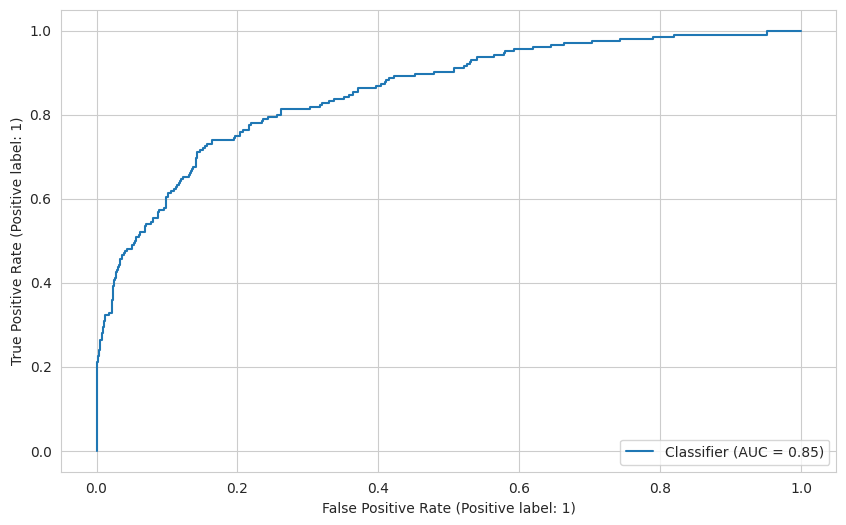

In [117]:
y_pred_roc = optuna_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc)
roc_auc_score(y_test, y_pred_roc)

### with and without early_stop are both have bad preformance !!

# Final Model and Model Deployment

## Comparing Models

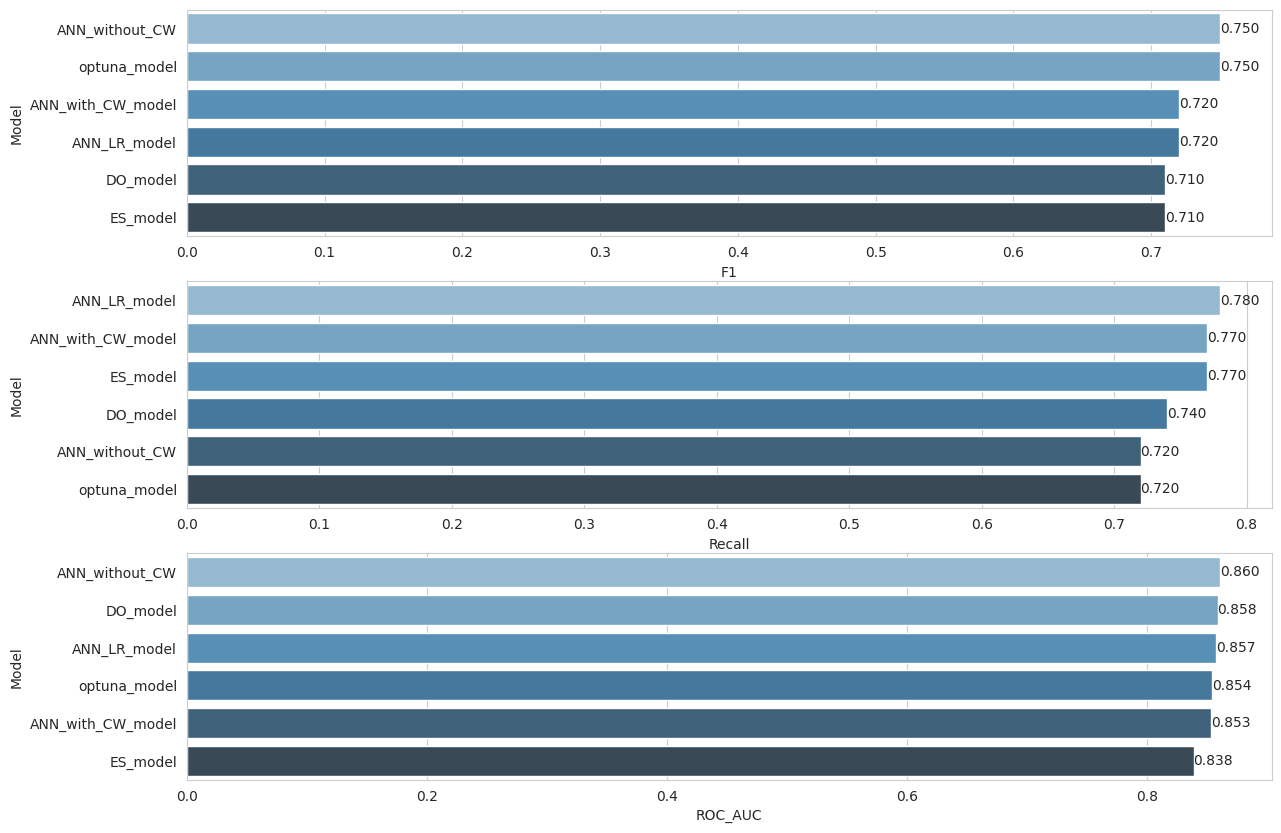

In [122]:
# compare = pd.DataFrame({"Model": ["ANN_without_CW","SVC","RF","XGBoost"],
#                         "F1": [LR_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
#                         "Recall": [LR_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
#                         "ROC_AUC": [LR_AP, svc_AP, rf_AP, xgb_AP],
#     })

compare = pd.DataFrame({"Model": ["ANN_without_CW","ANN_with_CW_model","ANN_LR_model","DO_model","ES_model","optuna_model"],
                        "F1": [ANN_without_CW_f1, ANN_with_CW_model_f1, ANN_LR_model_f1, DO_model_f1,ES_model_f1,optuna_model_f1],
                        "Recall": [ANN_without_CW_recall, ANN_with_CW_model_recall, ANN_LR_model_recall, ES_model_recall,DO_model_recall,optuna_model_recall],
                        "ROC_AUC": [ANN_without_CW_AP, ANN_with_CW_model_AP, ANN_LR_model_AP, DO_model_AP,ES_model_AP,optuna_model_AP],
    })

plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show()

## ANN_LR_model which is the ANN with Class weight and learning rate=0.005 is preform better if I consider the Recall and ROC_AUC>
### In the other hand, optuna_model wasn't the best in Recall although the Recall was the trial_metric, which was shocked me !!

In [124]:
X = df.drop("Exited", axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=SEED)

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore",sparse=False), df.select_dtypes("object").columns ),
                        remainder=MinMaxScaler(),
                        verbose_feature_names_out=False)


X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [125]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
Final_Model = Sequential()

Final_Model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
Final_Model.add(Dense(9, activation="relu"))
Final_Model.add(Dense(9, activation="relu"))
Final_Model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005) # Defaults is 0.001
Final_Model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

Final_Model.fit( x=X_train, y=y_train, validation_split=0.1, batch_size=50,
          epochs=200, verbose=1,
          class_weight = {0: class_weights[0], 1: class_weights[1]})


Epoch 1/200
162/162 [==============================] - 2s 5ms/step - loss: 0.6331 - recall: 0.6707 - val_loss: 0.5195 - val_recall: 0.6409
Epoch 2/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5578 - recall: 0.7010 - val_loss: 0.4248 - val_recall: 0.6851
Epoch 3/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5104 - recall: 0.7464 - val_loss: 0.4232 - val_recall: 0.7514
Epoch 4/200
162/162 [==============================] - 1s 4ms/step - loss: 0.5021 - recall: 0.7530 - val_loss: 0.4422 - val_recall: 0.8066
Epoch 5/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4991 - recall: 0.7567 - val_loss: 0.4716 - val_recall: 0.8232
Epoch 6/200
162/162 [==============================] - 1s 4ms/step - loss: 0.4914 - recall: 0.7597 - val_loss: 0.4903 - val_recall: 0.8564
Epoch 7/200
162/162 [==============================] - 1s 5ms/step - loss: 0.4853 - recall: 0.7669 - val_loss: 0.4269 - val_recall: 0.8066
Epoch 8/200
162/162 [======

In [126]:
import pickle

pickle.dump(column_trans, open("column_transformer", "wb"))

In [127]:
Final_Model.save("model_Churm.h5")

## Loading Model and Scaler

In [132]:
from tensorflow.keras.models import load_model
model_Churm = load_model("model_Churm.h5")
column_trans = pickle.load(open("column_transformer", "rb"))

In [133]:
model_Churm


## Prediction

In [134]:
single_customer = df.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880


In [135]:
single_customer = column_trans.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [136]:
(model_Churm.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 66ms/step


array([[1]], dtype=int32)

In [142]:
print(df.iloc[0:1, :]["Exited"])

0    1
Name: Exited, dtype: int64


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___